In [1]:
import pandas as pd
import numpy as np
data = pd.read_csv('anomaly_data.csv')
data.head()

,x1,x2
0,8.046815,9.741152
1,8.408520,8.763270
2,9.195915,10.853181
3,9.914701,11.174260
4,8.576700,9.042849


In [26]:
print(data)

            x1         x2
0     8.046815   9.741152
1     8.408520   8.763270
2     9.195915  10.853181
3     9.914701  11.174260
4     8.576700   9.042849
..         ...        ...
302   7.476629   9.459370
303  14.582573   5.411619
304  18.339868  11.298874
305  13.261188  12.978309
306  -0.247387  19.350407

[307 rows x 2 columns]


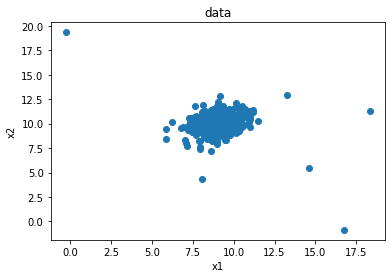

In [2]:
%matplotlib inline
from matplotlib import pyplot as plt
plt.scatter(data.loc[:,'x1'],data.loc[:,'x2'])
plt.title('data')
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()

In [4]:
x1 = data.loc[:,'x1']
x2 = data.loc[:,'x2']

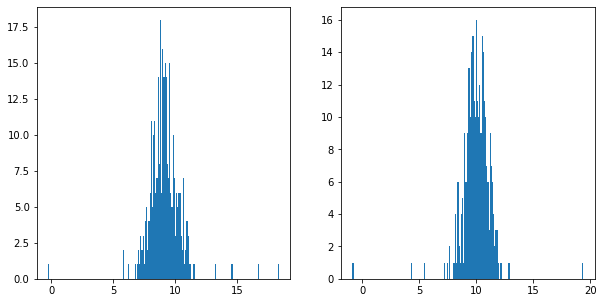

In [8]:
fig2 = plt.figure(figsize=(10,5))
plt.subplot(121)
plt.hist(x1,bins=200)
plt.subplot(122)
plt.hist(x2,bins=200)
plt.show()

In [14]:
x1_mean = x1.mean()
x1_sigma = x1.std()
x2_mean = x2.mean()
x2_sigma = x2.std()


$$f(x, a) = \frac{1}{x^2 \Phi(a) \sqrt{2\pi}} *
                  \exp(-\frac{1}{2} (a-1/x)^2)$$

In [16]:
print(x1_range,x2_range)

[ 0.          0.06688963  0.13377926  0.2006689   0.26755853  0.33444816
  0.40133779  0.46822742  0.53511706  0.60200669  0.66889632  0.73578595
  0.80267559  0.86956522  0.93645485  1.00334448  1.07023411  1.13712375
  1.20401338  1.27090301  1.33779264  1.40468227  1.47157191  1.53846154
  1.60535117  1.6722408   1.73913043  1.80602007  1.8729097   1.93979933
  2.00668896  2.0735786   2.14046823  2.20735786  2.27424749  2.34113712
  2.40802676  2.47491639  2.54180602  2.60869565  2.67558528  2.74247492
  2.80936455  2.87625418  2.94314381  3.01003344  3.07692308  3.14381271
  3.21070234  3.27759197  3.34448161  3.41137124  3.47826087  3.5451505
  3.61204013  3.67892977  3.7458194   3.81270903  3.87959866  3.94648829
  4.01337793  4.08026756  4.14715719  4.21404682  4.28093645  4.34782609
  4.41471572  4.48160535  4.54849498  4.61538462  4.68227425  4.74916388
  4.81605351  4.88294314  4.94983278  5.01672241  5.08361204  5.15050167
  5.2173913   5.28428094  5.35117057  5.4180602   5.

In [18]:
from scipy.stats import norm
x1_range = np.linspace(0,20,300)
x1_normal = norm.pdf(x1_range,x1_mean,x1_sigma)
x2_range = np.linspace(0,20,300)
x2_normal = norm.pdf(x2_range,x2_mean,x2_sigma)

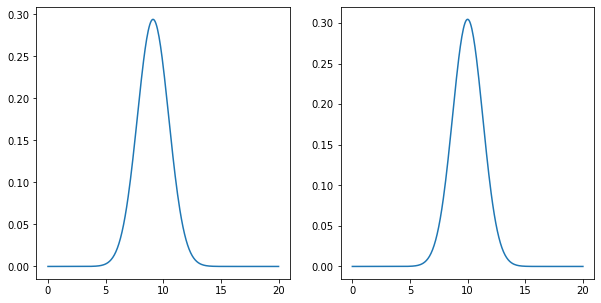

In [19]:
fig2 = plt.figure(figsize=(10,5))
plt.subplot(121)
plt.plot(x1_range,x1_normal)
plt.subplot(122)
plt.plot(x2_range,x2_normal)
plt.show()

In [20]:
from sklearn.covariance import EllipticEnvelope
ad_model = EllipticEnvelope()
ad_model.fit(data)

EllipticEnvelope()

In [21]:
y_predict = ad_model.predict(data)

In [22]:
print(pd.value_counts(y_predict))

 1    276
-1     31
dtype: int64


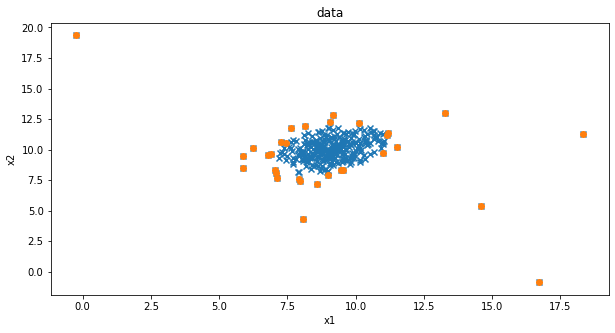

In [27]:
%matplotlib inline
fig5 = plt.figure(figsize=(10,5))
plt.scatter(data.loc[:,'x1'],data.loc[:,'x2'],marker='x')
plt.scatter(data.loc[:,'x1'][y_predict==-1],data.loc[:,'x2'][y_predict==-1],marker='o')
plt.title('data')
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()

 1    300
-1      7
dtype: int64


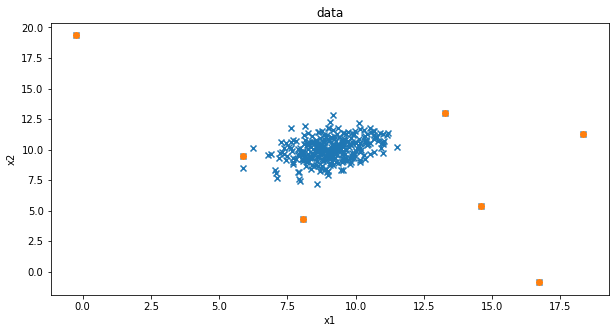

In [29]:
ad_model = EllipticEnvelope(contamination=0.02)
ad_model.fit(data)
y_predict = ad_model.predict(data)
print(pd.value_counts(y_predict))
fig5 = plt.figure(figsize=(10,5))
plt.scatter(data.loc[:,'x1'],data.loc[:,'x2'],marker='x')
plt.scatter(data.loc[:,'x1'][y_predict==-1],data.loc[:,'x2'][y_predict==-1],marker='o')
plt.title('data')
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()